In [119]:
import pandas
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from plotnine import ggplot, aes, geom_point, geom_line
from plotnine.themes import theme_minimal


In [176]:
data=pandas.read_csv('refugee_data/individualsPerCountry_normalized_withoutRussia.csv')

In [177]:
data


,Unnamed: 0,country,bilateral_migration,export_trade_share,migrant_ratio,same_language,touching,Total_pop_left_conflict_zone,individualPerCountry,population,...,normalized_export_trade,Afghanistan,Burundi,Central African Republic,Democratic Republic of the Congo,Somalia,South Sudan,Syria,Ukraine,Venezuela
0,1,Angola,258105,0.110,2.1,0,1,1018762,37084,31127674,...,-0.357306,0,0,0,1,0,0,0,0,0
1,2,Argentina,10915,0.040,4.9,1,0,5041821,170517,45605826,...,-0.244603,0,0,0,0,0,0,0,0,1
2,3,Brazil,2515,0.200,0.9,0,1,5041821,316133,212688125,...,1.549150,0,0,0,0,0,0,0,0,1
3,4,Burundi,173417,0.010,2.8,1,1,1018762,84961,11865821,...,-0.363947,0,0,0,1,0,0,0,0,0
4,5,Cameroon,285641,13.250,2.0,1,1,737973,346784,26545864,...,1.788020,0,0,1,0,0,0,0,0,0
5,6,Central African Republic,34601,0.230,1.9,1,1,1018762,5702,4666368,...,-0.349336,0,0,0,1,0,0,0,0,0
6,7,Chad,89598,0.160,3.2,1,1,737973,121253,16244513,...,-0.453856,0,0,1,0,0,0,0,0,0
7,8,Chile,5120,0.060,7.0,1,0,5041821,448138,17574003,...,-0.020384,0,0,0,0,0,0,0,0,1
8,9,Colombia,49829,0.270,2.3,1,1,5041821,1842390,50372424,...,2.333917,0,0,0,0,0,0,0,0,1
9,10,Costa Rica,4984,0.020,8.3,1,0,5041821,29906,5094118,...,-0.468822,0,0,0,0,0,0,0,0,1


In [78]:
# country_conflict = data[["country", 'individualPerCountry','percent_IndividualPerCountry_of_total','percent_IndividualPerCountry_of_recorded','normalized_refugee' ]]

In [178]:
y=data['percent_IndividualPerCountry_of_recorded']

In [182]:
features_normalized = data[["Afghanistan","Burundi","Central African Republic","Democratic Republic of the Congo"
,"Somalia", "South Sudan","Syria","Ukraine","Venezuela","normalized_qrdp" ,"same_language","touching","normalized_lib", "normalized_pop", "gdp_per_cap","normalized_migr_ratio","normalized_export_trade", "normalized_bilateral_migr"]]

In [149]:
features_normalized = data[["normalized_qrdp" ,"same_language","touching","normalized_lib", "normalized_pop", "gdp_per_cap","normalized_migr_ratio"]]

In [168]:
features_normalized.head()

,Afghanistan,Burundi,Central African Republic,Democratic Republic of the Congo,Somalia,South Sudan,Syria,Ukraine,Venezuela,normalized_qrdp,same_language,touching,normalized_lib,normalized_pop,gdp_per_cap,normalized_migr_ratio,normalized_export_trade,normalized_bilateral_migr
0,0,0,0,1,0,0,0,0,0,-1.130963,0,1,-1.137240,0.145513,0.002260,-0.279793,-0.357306,1.174665
1,0,0,0,0,0,0,0,0,1,1.003070,1,0,0.740725,-0.033002,0.009981,0.490914,-0.244603,-0.116315
2,0,0,0,0,0,0,0,0,1,0.099903,0,1,1.413038,2.526772,0.007738,-1.121042,1.549150,-0.732680
3,0,0,0,1,0,0,0,0,0,-0.816769,1,1,-0.972716,-0.758244,0.000269,0.105496,-0.363947,0.446657
4,0,0,1,0,0,0,0,0,0,0.537315,1,1,-0.233334,-0.315123,0.001688,-0.061142,NaN,1.111459


In [183]:
y.head()

0    0.037758
1    0.034470
2    0.063906
3    0.086505
4    0.471566
Name: percent_IndividualPerCountry_of_recorded, dtype: float64

In [169]:

# Run linear model 
import matplotlib.pyplot as plt

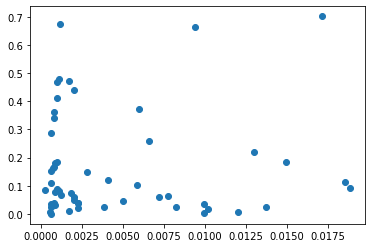

In [170]:
plt.scatter(data.gdp_per_cap,data.percent_IndividualPerCountry_of_recorded)

In [184]:
import statsmodels.api as sm

In [185]:
results=sm.OLS(y,features_normalized).fit()

In [188]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     percent_IndividualPerCountry_of_recorded   R-squared:                       0.720
Model:                                                  OLS   Adj. R-squared:                  0.588
Method:                                       Least Squares   F-statistic:                     5.444
Date:                                      Mon, 11 Apr 2022   Prob (F-statistic):           9.83e-06
Time:                                              14:03:14   Log-Likelihood:                 49.169
No. Observations:                                        54   AIC:                            -62.34
Df Residuals:                                            36   BIC:                            -26.54
Df Model:                                                17                                         
Covariance Type:                                  nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Afghanistan                          0.2657      0.086      3.077      0.004       0.091       0.441
Burundi                              0.2813      0.087      3.248      0.003       0.106       0.457
Central African Republic             0.2365      0.085      2.772      0.009       0.063       0.410
Democratic Republic of the Congo     0.1040      0.059      1.760      0.087      -0.016       0.224
Somalia                              0.2131      0.061      3.478      0.001       0.089       0.337
South Sudan                          0.2373      0.085      2.790      0.008       0.065       0.410
Syria                                0.2131      0.089      2.384      0.023       0.032       0.394
Ukraine                              0.2939      0.159      1.851      0.072      -0.028       0.616
Venezuela                            0.0650      0.096      0.674      0.504      -0.130       0.260
normalized_qrdp                      0.0128      0.024      0.531      0.599      -0.036       0.062
same_language                       -0.0097      0.046     -0.212      0.833      -0.102       0.083
touching                            -0.0341      0.051     -0.668      0.508      -0.137       0.069
normalized_lib                       0.0480      0.026      1.877      0.069      -0.004       0.100
normalized_pop                       0.0117      0.026      0.451      0.655      -0.041       0.065
gdp_per_cap                          4.3491      7.680      0.566      0.575     -11.227      19.925
normalized_migr_ratio               -0.0073      0.022     -0.337      0.738      -0.051       0.037
normalized_export_trade              0.0215      0.022      0.978      0.335      -0.023       0.066
normalized_bilateral_migr            0.1260      0.021      5.970      0.000       0.083       0.169
==============================================================================
Omnibus:                        8.065   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.212
Skew:                           0.787   Prob(JB):                       0.0272
Kurtosis:                       3.852   Cond. No.                         609.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

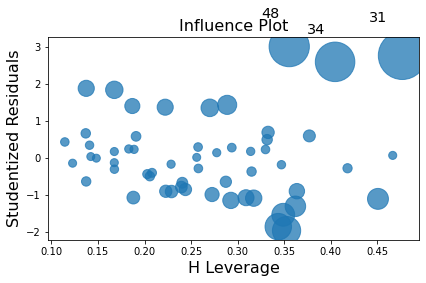

In [107]:
fig = sm.graphics.influence_plot(results, criterion="cooks")
fig.tight_layout(pad=1.0)

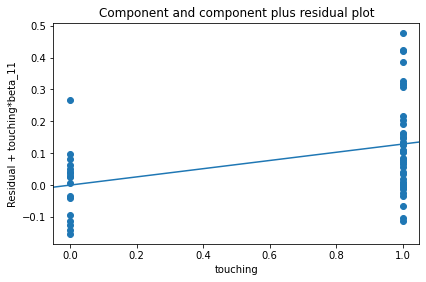

In [117]:
fig = sm.graphics.plot_ccpr(results, "touching")
fig.tight_layout(pad=1.0)

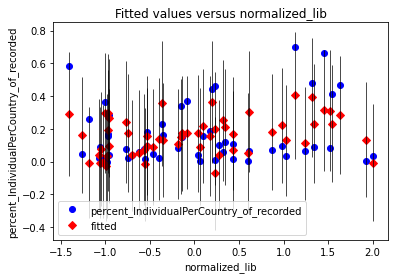

In [116]:
fig = sm.graphics.plot_fit(results, "normalized_lib")


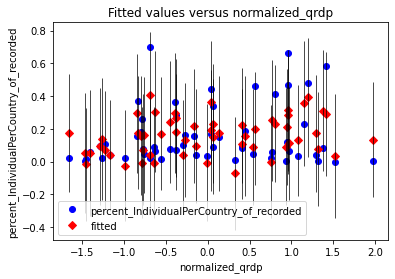

In [115]:
fig = sm.graphics.plot_fit(results, "normalized_qrdp")
